# SVM线性可分算法
## 优化目标：
### 假设在二维空间有一些点$ x_i=(x_i^{(1)},x_i^{(2)}) $,现在要找出一条直线拟合这些点
#### 选择与这些点具有最大的间隔的直线，假设拟合的直线为：$w^Tx_i+b=0$,令$$w^Tx_i+b≥+1,y_i=+1  （1）$$ $$w^Tx_i+b≤-1,y_i=-1（2）$$
那么上面两条线之间的间隔为$$ r=\frac{2}{||w||} （3）$$即我们需要优化的目标是$$ max\frac{2}{||w||} （4）$$同时必须使得这条直线将训练集分类正确,即$$s.t. y_i(w^Tx_i+b)≥1 ,i=1,2,...,m.（5）$$ 所以我们的优化目标就是：$$ min\frac{1}{2}||w||^2 $$ $$ s.t.y_i(w^Tx_i+b)≥1 ,i=1,2,...,m. $$
#### 这是一个二次规划(QP)问题，有一个python包可以直接求二次规划的结果：CVXOPT，网址：http://cvxopt.org/examples/tutorial/qp.html

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from cvxopt import matrix, solvers
from sklearn import preprocessing

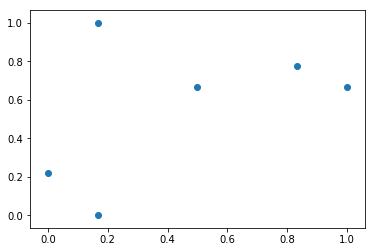

In [2]:
#x-y>0
X = np.array([[1,1.5],[2,4.5],[0.5,2.5],[1,6],[3,5],[3.5,4.5]])
y = [1,1,-1,-1,1,1]
#对X归一化
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)


plt.scatter(X[:,0],X[:,1])
plt.show()

In [3]:
def SVM(X,y):
    '''
    X:一列为一条数据
    y：列向量
    '''
    X = np.r_[np.array([1]*X.shape[1]).reshape(1,X.shape[1]),X]
    row,col = X.shape
    w = np.random.rand(row).reshape((row,1)) #w的第一个数为截距,假设w.T=[w0,w1,w2]，w.T*x = w0+w1*x1+x2*x2
    Q = np.eye(row,row)
    Q[0,0] = 0.0
    Q = matrix(Q)
    p = matrix(np.zeros((row,1)))
    A = matrix((y*X).T)
    c = matrix(np.array([1.0]*(col)).reshape((1,col)).T)
    
    print(Q)
    print(p)
    print(A)
    print(c)
    #sol=solvers.qp(Q, p, G, h, A, b)
    print("*"*100)
    sol=solvers.qp(Q, p, A, c)
    return sol

X = np.array(X)
y = np.array(y)
sol = SVM(X.T,y.T)
print(sol['x'])  # 打印结果，sol里面还有很多其他属性，读者可以自行了解

[ 0.00e+00  0.00e+00  0.00e+00]
[ 0.00e+00  1.00e+00  0.00e+00]
[ 0.00e+00  0.00e+00  1.00e+00]

[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]

[ 1.00e+00  1.67e-01  0.00e+00]
[ 1.00e+00  5.00e-01  6.67e-01]
[-1.00e+00 -0.00e+00 -2.22e-01]
[-1.00e+00 -1.67e-01 -1.00e+00]
[ 1.00e+00  8.33e-01  7.78e-01]
[ 1.00e+00  1.00e+00  6.67e-01]

[ 1.00e+00]
[ 1.00e+00]
[ 1.00e+00]
[ 1.00e+00]
[ 1.00e+00]
[ 1.00e+00]

****************************************************************************************************
     pcost       dcost       gap    pres   dres
 0:  4.0670e-01 -4.6661e+00  5e+00  5e-17  7e+00
 1:  6.7978e-02 -6.3576e-01  7e-01  2e-16  1e+00
 2:  1.3106e-04 -4.7466e-02  5e-02  2e-16  5e-02
 3:  1.4491e-08 -4.9007e-04  5e-04  2e-16  5e-04
 4:  1.4491e-12 -4.9008e-06  5e-06  1e-16  5e-06
 5:  1.4491e-16 -4.9009e-08  5e-08  2e-16  5e-08
Optimal solution found.
[ 4.24e-01]
[ 1.41e-08]
[ 9.59e-09]



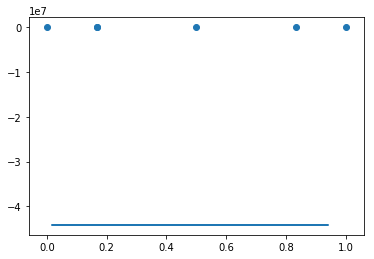

In [4]:
w = sol['x']
w0 = w[0]
w1 = w[1]
w2 = w[2]
#为X添加w0所对应的那一行
X_line = np.r_[np.array([1]*X.T.shape[1]).reshape(1,X.T.shape[1]),X.T]
w = np.array(w)

x_1 = np.random.rand(30)
x_2 = -(w0+w1*x_1)/w2

plt.scatter(X[:,0],X[:,1])
plt.plot(x_1,x_2)
plt.show()


# 下面没用

In [34]:
P = matrix([[1.0,0.0],[0.0,0.0]])   # matrix里区分int和double，所以数字后面都需要加小数点
q = matrix([3.0,4.0])
G = matrix([[-1.0,0.0,-1.0,2.0,3.0],[0.0,-1.0,-3.0,5.0,4.0]])
h = matrix([0.0,0.0,-15.0,100.0,80.0])
sol = solvers.qp(P,q,G,h)   # 调用优化函数solvers.qp求解
print(sol['x'])  # 打印结果，sol里面还有很多其他属性，读者可以自行了解

     pcost       dcost       gap    pres   dres
 0:  1.0780e+02 -7.6366e+02  9e+02  4e-17  4e+01
 1:  9.3245e+01  9.7637e+00  8e+01  8e-17  3e+00
 2:  6.7311e+01  3.2553e+01  3e+01  8e-17  1e+00
 3:  2.6071e+01  1.5068e+01  1e+01  7e-17  7e-01
 4:  3.7092e+01  2.3152e+01  1e+01  1e-16  4e-01
 5:  2.5352e+01  1.8652e+01  7e+00  9e-17  4e-16
 6:  2.0062e+01  1.9974e+01  9e-02  7e-17  2e-16
 7:  2.0001e+01  2.0000e+01  9e-04  8e-17  2e-16
 8:  2.0000e+01  2.0000e+01  9e-06  1e-16  2e-16
Optimal solution found.
[ 7.13e-07]
[ 5.00e+00]



In [80]:
P = matrix([[1.0, 0.0], [0.0, 0.0]])
q = matrix([3.0, 4.0])
G = matrix([[-1.0, 0.0, -1.0, 2.0, 3.0], [0.0, -1.0, -3.0, 5.0, 4.0]])
h = matrix([0.0, 0.0, -15.0, 100.0, 80.0])

print(P)
print(q)
print(G)
print(h)

[ 1.00e+00  0.00e+00]
[ 0.00e+00  0.00e+00]

[ 3.00e+00]
[ 4.00e+00]

[-1.00e+00  0.00e+00]
[ 0.00e+00 -1.00e+00]
[-1.00e+00 -3.00e+00]
[ 2.00e+00  5.00e+00]
[ 3.00e+00  4.00e+00]

[ 0.00e+00]
[ 0.00e+00]
[-1.50e+01]
[ 1.00e+02]
[ 8.00e+01]

